# Project: Investigate the dataset: Medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset I have selected for analysis contains information abount medical appointments in Brazil. The dataset is focused on the question whether or not the patients show up for their appointment.

> In this analysis I'm going to investigate what factors are important to know in order to predict if a patient will go to the appointment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The name of the file containing the selected dataset is "noshowappointments-kagglev2-may-2016.csv". In this section I'm going to analyze the structure of the dataset and and perform changes if needed.

### General Properties

1. Load the data and take a look at it.

In [2]:
df_ns = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_ns.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


2. Let's see how many rows and columns are in the dataset:

In [3]:
df_ns.shape

(110527, 14)

> **Result:** There are 110527 rows and 14 columns in the data set.

3. Let"s see how many duplicates are in the dataset.

In [4]:
sum(df_ns.duplicated())

0

> **Result:** There is no duplicated row at all, so no change is needed regarding the duplicates.

4. The column "PatientId", AppointmentId" and "Neighbourhood" are not needed, so I drop them from the dataset.

In [5]:
df_ns.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)
df_ns.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No


> **Result:** PatientId, AppointmentID and Neighbourhood are no more part of the dataset.

5. Check the column names, and change if needed.

In [6]:
df_ns.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

> **Result:**  the column names are not uniformly, some of them are in camel case, others not. There is a typo in the column name 'Handcap" it should be "Handicap", and the last column name has a dash, which is not an error, but underscores make the usage easier, so change this column name too.

6. Rename the column names to make them uniformly. I prefer snake case.

In [7]:
df_ns.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

df_ns.rename(columns ={ "scheduledday":"scheduled_day", "appointmentday":"appointment_day", "handcap": "handicap"}, inplace=True)
df_ns.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

7. Check the data types and whether there are missing values

In [8]:
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           110527 non-null  object
 1   scheduled_day    110527 non-null  object
 2   appointment_day  110527 non-null  object
 3   age              110527 non-null  int64 
 4   scholarship      110527 non-null  int64 
 5   hipertension     110527 non-null  int64 
 6   diabetes         110527 non-null  int64 
 7   alcoholism       110527 non-null  int64 
 8   handicap         110527 non-null  int64 
 9   sms_received     110527 non-null  int64 
 10  no_show          110527 non-null  object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


> **Result:** 
> There are no missing values, since the dataset has 110527 entries, and each column has the same number of non-null value, so no change is needed.
> As for the data types, there are some columns that need to be changed:
- The type of patient_id is float, using a scientific number format for id is not practical, string or integer are more proper. I'm going to change it to integer, because the integer type needs less place in the memory.
- I have to check the data type of the columns "scheduled_day", "appointment_day", I suppose, they are strings, and if it is the case, I have to change it to a date type.

5. Check the type of the date columns and change them to date type

In [9]:
type(df_ns.scheduled_day[0]), type(df_ns.appointment_day[0]) 

(str, str)

> **Result:** both are strings so change them to a date type. Since I won't use the time part of the date, I'm going to drop them.

In [10]:
df_ns.scheduled_day = pd.to_datetime(df_ns.scheduled_day).dt.date
df_ns.appointment_day = pd.to_datetime(df_ns.appointment_day).dt.date
type(df_ns.scheduled_day[0]), type(df_ns.appointment_day[0]) 

(datetime.date, datetime.date)

6. Let's check whether the changes are correct.

In [11]:
df_ns.head(3)

,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No


> **Result:**  the columns names are uniformly, the patient_id is in a readable format, the scheduled_day and appointment_day contain only the date part.

### Data Cleaning
> In this section I'm going to change the data type of the no_show column to make it easier to use, and create a new column that I need for the analysis later.

1. Check the values in the column "no_show"

In [12]:
df_ns.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

> **Result:** the no_show column can have two values: Yes or No, but I'd like to use them in aggregation functions, therefore I need to change the type to integer: 0 for No and 1 for Yes.

In [13]:
df_ns["no_show"] = df_ns["no_show"].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
type(df_ns.no_show[0])

numpy.int64

> ** Result:** the type of the column is interger, let's check the values:

In [14]:
df_ns.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

> **Result:** the transformation was successful, because there are exactly the same number of zero before the transofmation for "No", and this is true for the value 1.

2. Let's create a new column, it will hold the difference between the scheduled_day and appointment_day in integer. I'm going to call the new column waiting_time.

In [15]:
df_ns["waiting_time"] = (df_ns.appointment_day - df_ns.scheduled_day).dt.days
df_ns.head(3)

,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0,0


In [16]:
type(df_ns.waiting_time[0])

numpy.int64

> **Result:** the new column appeared and its type is integer.

3. Let's inspect the values in the new column

In [17]:
df_ns.waiting_time.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

> **Result:** there are negative values in this columns, that means, the scheduled_day was later than the appointment_day. Let's see, how many negative values are in this column.

In [18]:
df_ns.query("waiting_time < 0")

,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
27033,M,2016-05-10,2016-05-09,38,0,0,0,0,1,0,1,-1
55226,F,2016-05-18,2016-05-17,19,0,0,0,0,1,0,1,-1
64175,F,2016-05-05,2016-05-04,22,0,0,0,0,0,0,1,-1
71533,F,2016-05-11,2016-05-05,81,0,0,0,0,0,0,1,-6
72362,M,2016-05-04,2016-05-03,7,0,0,0,0,0,0,1,-1


> **Result:** there are 5 rows with negative waiting_time. I cannot say the reason but I suppose, the employee mixed up the scheduled_day with the appointment_day, so I'm going to make the negative waiting time to positive.

In [19]:
df_ns["waiting_time"] = df_ns["waiting_time"].apply(lambda x: -1*x if x < 0 else x)
df_ns.query("waiting_time < 0")

,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time


> **Result:** there is no negative waiting time in the dataset.

4. Since I don't need anymore the scheduled_day and appointment_day, I drop them from the dataset.

In [20]:
df_ns.drop(['scheduled_day', 'appointment_day'], axis=1, inplace=True)
df_ns.head(2)

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,F,62,0,1,0,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0,0


> **Result:** the appointment_day and scheduled_day columns disappeared from the dataset.

5. Let's inspect the age values.

In [21]:
df_ns.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

> **Result:** there are negative values in this column too. Let's see how many rows are in the dataset with negative age.

In [22]:
df_ns.query("age < 0")

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
99832,F,-1,0,0,0,0,0,0,0,0


> **Result:** there is only one row, I'm going to drop it from the dataset.

In [23]:
df_ns.drop(df_ns[df_ns['age'] < 0].index, inplace = True)
df_ns.query("age < 0")

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time


> **Result:** there is no entry in the dataset with negative age.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 What differentiate the appointments the patients skipped from the ones they showed up for?

1. Create two masks for the dataset, appeared means that the patient came to the appointment, and skipped means that the patient didn't come to the appointment.

In [24]:
appeared = df_ns.no_show == 0
skipped = df_ns.no_show == 1

2. Let's see whether the chronic diseases are relevant or not. 

In [25]:
hip_app = df_ns[appeared]["hipertension"].mean() * 100
hip_skip = df_ns[skipped]["hipertension"].mean() * 100
dia_app = df_ns[appeared]["diabetes"].mean() * 100
dia_skip = df_ns[skipped]["diabetes"].mean() * 100
alc_app = df_ns[appeared]["alcoholism"].mean() * 100
alc_skip = df_ns[skipped]["alcoholism"].mean() * 100
hand_app = df_ns[appeared]["handicap"].mean() * 100
hand_skip = df_ns[skipped]["handicap"].mean() * 100

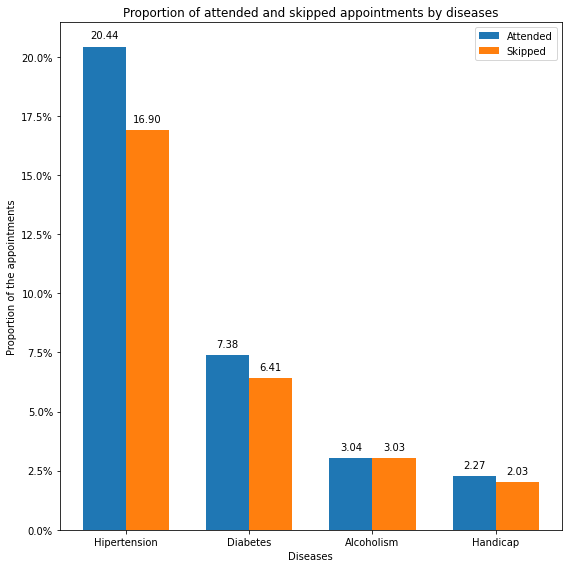

In [26]:
locations = np.asarray([1,2,3,4])
labels = ["Hipertension", "Diabetes", "Alcoholism", "Handicap"]

appeared_hights = [hip_app, dia_app, alc_app, hand_app]
skipped_hights = [hip_skip, dia_skip, alc_skip, hand_skip]

width = 0.35

fig, ax = plt.subplots(figsize=(8, 8))
rects1 = ax.bar(locations - width/2, appeared_hights, width, tick_label=labels, label='Attended')
rects2 = ax.bar(locations + width/2, skipped_hights, width, tick_label=labels, label='Skipped')

ax.set_ylabel('Proportion of the appointments')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('Diseases')
ax.set_title('Proportion of attended and skipped appointments by diseases')
ax.set_xticks(locations)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, fmt='%.2f',padding=6)
ax.bar_label(rects2, fmt='%.2f',padding=6)
fig.tight_layout()

plt.show()

> **Conclusions:**
- 20.44% of the attended appointments was made by hypertension patients but only 16.9% of the skipped by them. That means the hypertension patients relatively fewer skip an appointment.
- The difference between the attended and skipped appointments of the diabetes, alcoholism and handicap patients is less than 1%, which means these three diseases don's play a role whether the patient attend a medical apointment or not.

3. Let's see how the scholarship influences the patients in term of attending a medical appointment.

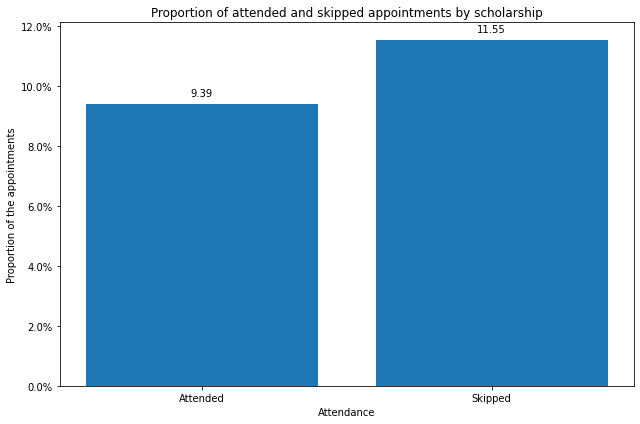

In [27]:
locations = [1, 2]

labels = ['Attended', 'Skipped']

heights = [df_ns[appeared]["scholarship"].mean() * 100, df_ns[skipped]["scholarship"].mean() * 100]

fig, ax = plt.subplots(figsize=(9, 6))
rects1 = ax.bar(locations, heights, tick_label=labels)

ax.set_ylabel('Proportion of the appointments')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('Attendance')
ax.set_title('Proportion of attended and skipped appointments by scholarship')
ax.set_xticks(locations)
ax.set_xticklabels(labels)

ax.bar_label(rects1, fmt='%.2f',padding=6)
fig.tight_layout()

plt.show()

> **Conclusion:** 9.39% of the attended appointments was made by patients getting a scholarship but 11.55% of the skipped appointments was set up by patients with scholarship. That means getting a scholarship will slightly raise the chance that the patient won't come to the appointment.

4. Sending an SMS will help patients to show up for their appointment?

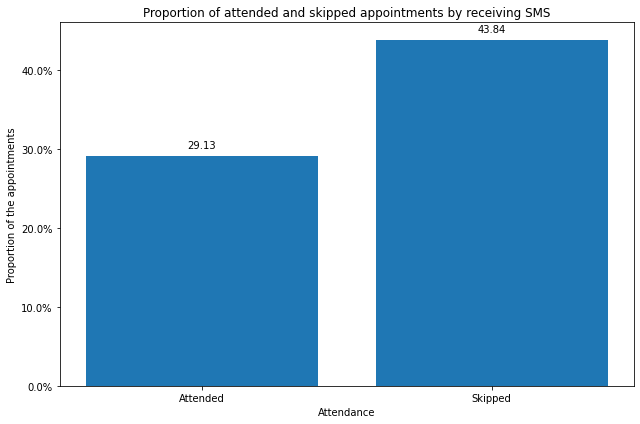

In [28]:
locations = [1, 2]

labels = ['Attended', 'Skipped']

heights = [df_ns[appeared]["sms_received"].mean()*100, df_ns[skipped]["sms_received"].mean()*100]

fig, ax = plt.subplots(figsize=(9, 6))
rects1 = ax.bar(locations, heights, tick_label=labels)

ax.set_ylabel('Proportion of the appointments')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('Attendance')
ax.set_title('Proportion of attended and skipped appointments by receiving SMS')
ax.set_xticks(locations)
ax.set_xticklabels(labels)

ax.bar_label(rects1, fmt='%.2f',padding=6)
fig.tight_layout()

plt.show()

> **Conclusion:** in this case the proportion of the skipped appointments are significantly higher than the proportion of the attended appointments. It means, that receiving a reminder SMS does not help patients to came to their appointments. But it does not mean, that getting an SMS will discourage patients to attend their medical appointment. In order to see the relationship between SMS and attandence needs further analysis, but this is out of the scope of the current investigation.

5. Does the gender play a role when it comes to visit a doctor?

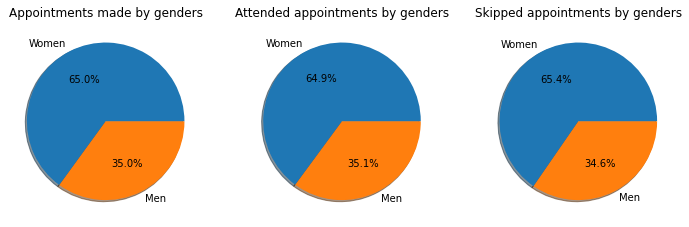

In [29]:
all_female = df_ns.query("gender == 'F'")["gender"].count()
app_female = df_ns[appeared].query("gender == 'F'")["gender"].count()
skip_female = df_ns[skipped].query("gender == 'F'")["gender"].count()

all_male = df_ns.query("gender == 'M'")["gender"].count()
app_male = df_ns[appeared].query("gender == 'M'")["gender"].count()
skip_male = df_ns[skipped].query("gender == 'M'")["gender"].count()

# Proportion of the appointments made by genders
all_patient = all_female + all_male
frac_all_female = (all_female / all_patient) *100
frac_all_male = 100 - frac_all_female

# Proportion of the attended appointments by genders
all_app = app_female + app_male
frac_app_female = (app_female / all_app) *100
frac_app_male = 100 - frac_app_female

# Proportion of the attended appointments by genders
all_skip = skip_female + skip_male
frac_skip_female = (skip_female / all_skip) *100
frac_skip_male = 100 - frac_skip_female

labels = ['Women', 'Men']
# Make figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# A standard pie plot
axs[0].set_title("Appointments made by genders")
axs[0].pie([frac_all_female, frac_all_male], labels=labels, autopct='%1.1f%%', shadow=True)
axs[1].set_title("Attended appointments by genders")
axs[1].pie([frac_app_female, frac_app_male], labels=labels, autopct='%1.1f%%', shadow=True)
axs[2].set_title("Skipped appointments by genders")
axs[2].pie([frac_skip_female, frac_skip_male], labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()

> **Conclusion:** Although women set up the 65% of the appointments and they showed up for the appointments mostly (64.9%), they also skipped in a large amount of the appointments (65.4%). In all cases the proportion of the women is around 65%, it means, that based on the gender we cannot predict, whether the patient comes to the appointment or not.

6. Let's inspect the age

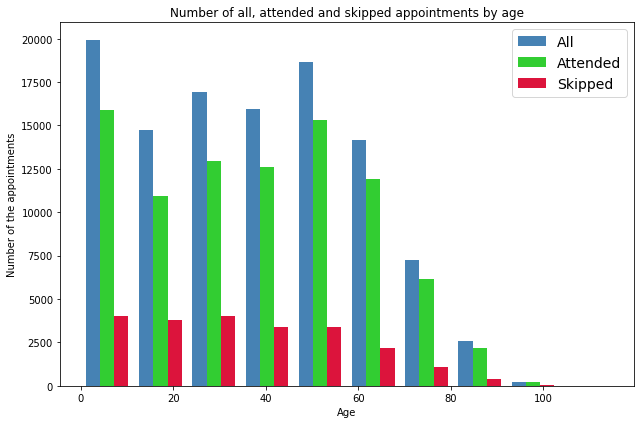

In [30]:
locations = [1, 2, 3]

heights = [df_ns["age"], df_ns[appeared]["age"], df_ns[skipped]["age"]]

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['steelblue','limegreen', 'crimson' ]
labels = ['All','Attended', "Skipped"]
ax.hist(heights, color=colors, label=labels)
ax.legend(prop={'size': 14})

ax.set_ylabel('Number of the appointments')

ax.set_xlabel('Age')
ax.set_title('Number of all, attended and skipped appointments by age')

fig.tight_layout()
plt.show()

> **Conclusion:**
- All the histograms are right skewed. The highest number of appointments was made for children under 10 years and in their case the attended and the skipped appointments are also the highest.
- The second highest number of appointment was made by ~50 years old patients, and in their case the skipped appoiments are slightly less than the appointments made by the former generations.
- Over 50 years patient made fewer appointments but the number of skipped appointments also decreases.

7. In order to have a clearer image of the importance of age, let's divide the female and male patients into age groups and see how the age influences their behaviour. The idea behind this is that people's behavriours change over the lifetime.
> 
The consideration behind the partitioning is the following:
    - Children: people under 18 years are underage
    - Young Adults: people between 18 and 44 are busy with earning a living, raising a family
    - Middle Aged: people between 45 and 64 are still occupied but the children are already grown up 
    - Retired: people over 65 

In [31]:
bin_edges = [0, 17, 44, 64, 117]
bin_names = ['Children', 'Young Adults', 'Middle Aged', 'Retired']
df_ns['age_group'] = pd.cut(df_ns['age'], bin_edges, labels=bin_names)

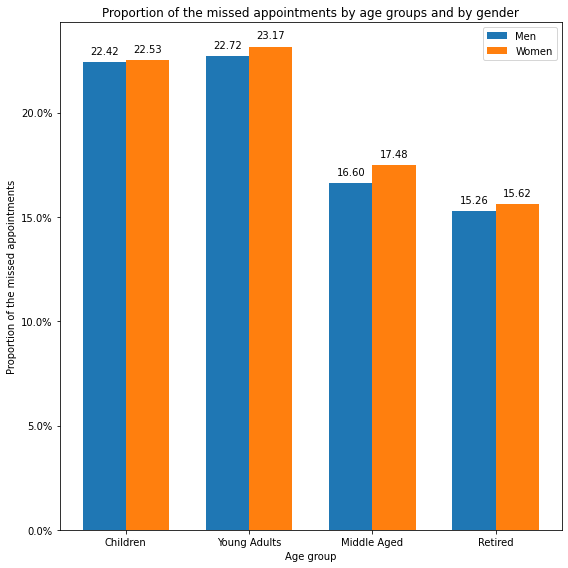

In [32]:
locations = np.asarray([1,2,3,4])
labels = bin_names
women_hights = df_ns.query("gender == 'F'").groupby("age_group")["no_show"].mean() * 100
men_hights = df_ns.query("gender == 'M'").groupby("age_group")["no_show"].mean() * 100

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 8))
rects1 = ax.bar(locations - width/2, men_hights, width, tick_label=labels, label='Men')
rects2 = ax.bar(locations + width/2, women_hights, width, tick_label=labels, label='Women')

ax.set_ylabel('Proportion of the missed appointments')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('Age group')
ax.set_title('Proportion of the missed appointments by age groups and by gender')
ax.set_xticks(locations)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, fmt='%.2f',padding=6)
ax.bar_label(rects2, fmt='%.2f',padding=6)
fig.tight_layout()

plt.show()

> **Conclusion:** 
- In case of all age groups women skipped slightly more appointments than men, however the difference is not significant.
- Young adults independently of the gender skipped the most appointments.
- Middle aged and retired patients are more health-conscious than the young adults, they skip the appointment respectively ~6% and ~7% fewer than the younger generation.

### Research Question 2  Does the waiting time play a role regarding the visitation at the hospital?

1. In order to answer the question let's see the basic statistics of the waiting time for the skipped and the attended appointments.

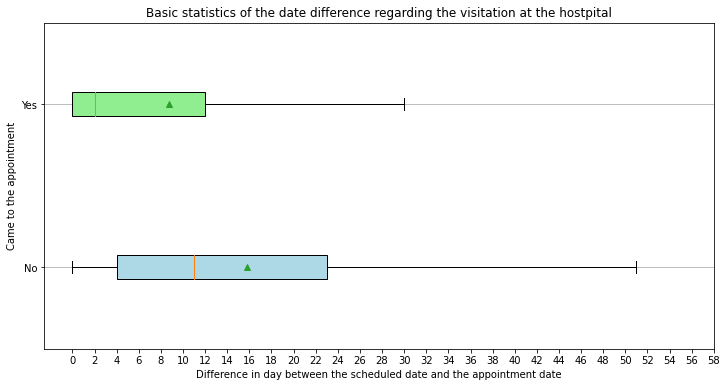

In [33]:
noshowed = df_ns[skipped]["waiting_time"]
showed = df_ns[appeared]["waiting_time"]

labels = ["No", "Yes"]
fig, axs = plt.subplots(figsize=(12, 6), sharey=True)
bplot1 = axs.boxplot([noshowed, showed],
                     vert=False,  
                     patch_artist=True,  
                     labels=labels, 
                     showfliers=False, 
                     showmeans=True)  

colors = ['lightblue', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

axs.set_xticks(np.arange(0, 60, step=2))

axs.yaxis.grid(True)
axs.set_title('Basic statistics of the date difference regarding the visitation at the hostpital')
axs.set_xlabel('Difference in day between the scheduled date and the appointment date')
axs.set_ylabel('Came to the appointment')
plt.show()   

> **The asnwer is: yes**, it plays a role.
- The patients, who skipped the appointment, got a date almost twice later in average than the patients who appeared: the mean of the date difference in case of the not showed up patients is around 15 days and 8 days in case of the showed up patients.
- The length of the left whisker of the 'Yes' box is zero, it means that the first quater of the patients got an appointment on the same day in contrast to the patient who didn't show up. In their case the first quater got an appointment in 4 days. 
- The length of the left whisker of the 'Yes' box is zero, it means that the first quater of the patients got an appointment on the same day in contrast to the patient who didn't show up. In their case the first quater got an appointment in 4 days. 



<a id='conclusions'></a>
## Conclusions

> - The higher age groups skip fewer medical appointments as the younger generation. So there is correlation between the age group and the attendance.
> - The chronic diseases, like diabetes, alcoholism and handicap does not influence whether or not the patient showed up for the appointment.
> - Getting a scholarship slightly raises the probability of skipping the medical appointment.
> - The gender also does not play a role.
> - Receiving an SMS does not make patients attend their medical appointments. 
> - The waiting time (the time-span between the scheduled day and the appointment day) is crucial, so there is a strong correlation between the waiting time and the attendance. The probability of skipping the appointment raises with the waiting time.

